## Nedbørsoppgaven Del 4: Omorganisering av datasett

*Nedbørsoppgavene Del 1 til 5 er laget som støtte-oppgaver til oppgaven "Nedbør i Norge". Oppgaven "Nedbør i Norge" er en lengre oppgave som kommer innom mange forskjellige programerings-elementer. Intensjonen er at hvis man først gjør deloppgavene 1 til 5 og så går gjennom det nokså omfattende eksempelet på starten av oppgaven "Nedbør i Norge" så vil det programeringstekniske i oppgaven "Nedbør i Norge" være repetisjon, slik at man kan fokusere på den naturvitenskaplige tolkningen av dataene. På denne måten får man både trening i programmering og erfaring med hvordan det kan brukes til å studere og forstå naturvitenskaplige prosesser.*

-------------

I [del 1](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del1_Indeksering.ipynb) og [del 3](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del3_Plotting_av_tidsserier.ipynb) av dette oppgavesettet har vi gått gjennom 
- indeksering og hvordan man kan dele inn en tidsserie ved help av indeksering, 
- hvordan man plotter tidsserier ved hjelp av pakken `matplotlib`. 

Nå skal vi bruke dette til å se på hvordan man kan velge ut spesifikke indekser fra et større datasett og sette dette sammen til et nytt datasett. Ved hjelp av [del 3](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del3_Plotting_av_tidsserier.ipynb) kan vi fremstille resultatet på en oversiktlig måte. 

#### Last inn pakkene som tengs

In [1]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer

import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
#sys.path.append(r"W:\Work\Documents\EkteData\EkteData\Funksjoner")
sys.path.append(r"C:\Users\iren_\Documents\EkteData\Funksjoner")
from EkteDataFunk import loadData # for filinnlasting

#### 1. Last inn et datasett
For denne delen bruker vi et større datasett enn i Del 1 til 3 slik at vi har litt mer å ta utgangspunkt i. Dette datasettet har like mange rader, men 13 kolonner: en for tid, og tolv for hver av månedene.  

In [3]:
file='TempBergen.txt'
temp, tid = loadData(file)

In [4]:
print(tid)
print(temp)
print('temp shape=',temp.shape)

[1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871. 1872.
 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883. 1884.
 1885. 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895. 1896.
 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908.
 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.
 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932.
 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944.
 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956.
 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968.
 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980.
 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992.
 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021.]
[[ nan  1.1  3.1 ..

Matrisen `temp` er for stor til at alle dataverdiene vises: `temp` har 161 rader og 12 kolonner. Derfor står det  `...` for å vise at ikke hele datasettet vises. 

Datasettene vi har sett på frem til nå ha hatt to kolonner: en for år og en for gjennomsnittstemperatur det året. Nå har vi 12 kolonner i `temp`, altså en kolonne for hver måned. 

#### 2. Del datasettet inn i sesonger
Siden vi nå har temperaturverdier for alle månedene, og ikke bare års-gjennomsnitt, kan vi sammenligne månedene mot hverandre, for eksempel januar-temperatur sammenlignet med juli-temperatur:

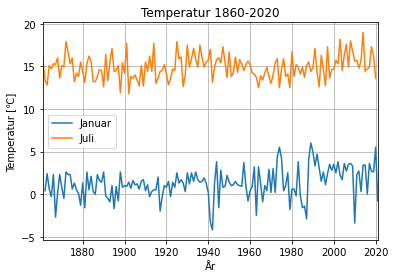

In [12]:
ax=plt.axes()

# Plot tidsserien for januar
ax.plot(tid, temp[:,0], label='Januar')

# Plot tidsserien for juli
ax.plot(tid, temp[:,6], label='Juli')

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]',
    xlim=(tid[0], tid[-1]), 
) 
ax.grid() 
ax.legend()
plt.show() 

Det er tydlig at temperaturen er veldig forskjellig i januar og i juli i Bergen. Hvis vi plotter gjennomsnittet for hver år sammen med januar og juli-kurvene ser vi at månedlig oppløsning tilfører mye informasjon:

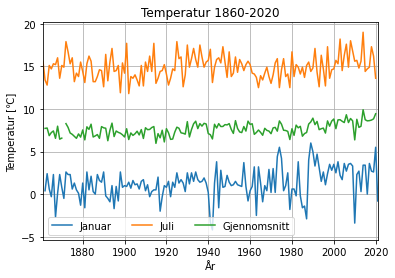

In [16]:
ax=plt.axes()

# Plot tidsserien for januar
ax.plot(tid, temp[:,0], label='Januar')

# Plot tidsserien for juli
ax.plot(tid, temp[:,6], label='Juli')

# Plot tidsserien for gjennomsnittlig års-temperatur
ax.plot(tid, np.mean(temp, axis=1), label='Gjennomsnitt')

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]',
    xlim=(tid[0], tid[-1]), 
) 
ax.grid() 
ax.legend(ncol=3)
plt.show() 

Vi kan også se på sesongene i forhold til hverandre. Det er lettere å sammenligne fire tidsserier enn 12 tidsserier, og det er ikke sikkert man alltid trenger alle detaljene fra hver måned selv om årsoppløsningen er for lav. Dette gjøre vi i denne oppgaven: vi setter månedene sammen til sesonger, og ser på endringen i sesongene over tid. 

In [17]:
# Vår: alle rader utenom den siste (den er kun NaN) og kolonnene 2 til og 
# ikke med 5, altså mars, april og mai
vår=temp[:-1,2:5] 

# Sommer: alle rader utenom den siste (kun NaN) og kolonnene for juni, juli 
# og august
sommer=temp[:-1,5:8]

# Høst: alle rader utenom den siste (kun NaN) og kolonnenen for september, 
# oktober og november
høst=temp[:-1,8:11]

In [18]:
vår.shape, sommer.shape, høst.shape

((160, 3), (160, 3), (160, 3))

#### 3. Spesialbehandling for vinter
Vinter er litt tricky: januar og februar, og desember samme år hører ikke til samme vinter. Vi deler derfor vinter inn i `Des` (desember) og `JanFeb`  (januar og februar), og setter dem sammen igjen til en matrise etterpå. Vinter 1862 er den første vinter-verdien vi har, og består av desember 1861 og januar og februar 1862. Vinter 2021 er den siste vinteren (desember 2020 og januar og februar 2021). Vi har altså like mange vinter-verdiene som vår, sommer og høst-verdier, men vinter-verdiene er forskjøvet med ett år. Ta en titt på hvordan datasettet ser ut [her](https://github.com/irendundas/EkteData/blob/main/data/TempBergen.txt), så blir det tydeligere hvorfor vinterverdiene er forskjøvet.

In [28]:
Des=temp[:-1,11] 
# Vi må bruke :-1 fordi vi vil ha 1861 til og med 2020: vi vil ikke ha med den 
# aller siste desember-verdien

JanFeb=temp[1:,0:2] # Jan og Feb fra og med 1862, kolonne 1 og 2. 

In [29]:
Des.shape, JanFeb.shape

((160,), (160, 2))

Nå er "JanFeb" alle januar og februar-månedene fra 1862 til og med 2021, mens "Des" er desember fra 1861 til og med 2020. Vi lar Januar og Februar "bestemme" hvilket år vinteren hører til, så vi har altså vinter-data fra 1862-2021. 

Vi vil sette disse to arrayene sammen til ett array slik at det får likt oppsett som de andre sesongene. Det finnes mange måter å gjøre dette på, og vi går gjennom to metoder her

**Metode 1:**
Lag et tomt array med rette dimensjoner og plugg arrayene du vil sette sammen inn i det tomme arrayet. Dette forutsetter at du vet de endelige dimensjonene på forhånd. 

In [30]:
# Lag et array med dimensjoner 160 x 3 (160 år, 3 måneder) som er fylt med 0
vinter=np.zeros((160,3)) 

# Putt desember-vektoren til den første kolonnen i "vinter"
vinter[:,0]=Des

# Putt januar/februar-vektoren til andre og tredje kolonne i "vinter"
vinter[:,1:]=JanFeb

# Skriv ut vinter for å se at det ser rett ut
vinter

array([[ 4.7,  0.4,  0.8],
       [ 4.5,  2.4,  3.3],
       [ 2.2,  0.6, -0.5],
       [ 3.2, -0.3, -1.8],
       [ 6.1,  2.3,  1.2],
       [ 1.9, -2.7,  3. ],
       [ 1.4,  0.1,  2.6],
       [ 4.1,  2.3,  2.9],
       [ 0.1,  0.8, -1.1],
       [-2.2, -0.5,  nan],
       [ 2. ,  2.6,  3.4],
       [ 0.1,  2.3,  1.2],
       [ 6.5,  2.3,  3.4],
       [-3.5,  0.6, -1.7],
       [ 3.4,  1.3,  0. ],
       [-1.2,  0.5,  0. ],
       [ 3.4,  0.1,  2.9],
       [-5.1, -1.3, -1. ],
       [ 2. ,  1.3,  3.7],
       [-0.1, -1.6, -1.6],
       [ 5.9,  2.6,  3.1],
       [-1.5,  0.5,  2.8],
       [ 3.4,  2.1,  2.9],
       [ 3.2,  0.3,  3.2],
       [ 3.9,  0. , -0.5],
       [ 0. ,  2.3,  3.3],
       [ 0.3,  1.6, -2. ],
       [ 5.9,  1.4, -1.5],
       [ 3.7,  2.6,  1.1],
       [ 0.1, -0.2,  3.2],
       [ 4.6, -0.5, -0.1],
       [ 0.1, -0.9,  0.5],
       [ 5.8,  1. ,  1.9],
       [ 4.9, -1.7, -3.6],
       [ 0.8,  0.9,  2.4],
       [ 1.6, -0.8,  0.8],
       [ 3.4,  2.6,  1.3],
 

**Metode 2:**
Bruk en ny funksjon: `np.concatenate`. Denne funksjonen tar et sett med matriser eller vektorer og setter dem sammen langs den aksen du spesifiserer. Vektorene/matrisene må være like lange langs en av aksene, i dette tilfellet tidsaksen. Matrisen kan bygges på i den retningen som har ulik dimensjon. 

Se for deg at du skal stable tallerkner. Alle tallerknene må ha lik diameter. Dette er den dimensjonen som må være lik for å stable. Men du kan ha en tallerken og stable oppå tre nye samtidig. Dette er den dimensjonen som ikke trenger å være lik. I vårt tilfelle er tidsaksen lik, mens antall måneder kan være ulik. `axis=1` betyr at vi stabler måneder. 

In [31]:
vinter=np.concatenate((Des, JanFeb), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

Her får vi en **feilmelding**. Se på `ValueError:` *axis 1 is out of bounds for array of dimension 1*. Probelmet er altså noe med dimensjonene. Se tilbake på `Des.shape` og `JanFeb.shape` som var `(160,)` og `(160, 2)`. Vi prøver altså å bygge på langs `axis=1`, men `Des` har kun en dimensjon. 

For at dimensjonene skal stemme må vi legge til en dimensjon for "Des". Dette kan vi gjøre med funksjonen `np.newaxis`. `Des[:,np.newaxis].shape = (160,1)`, altså to dimensjoner, så da fungerer np.concatenate. 

Vi prøver på nytt: 

In [36]:
vinter=np.concatenate((Des[:,np.newaxis], JanFeb), axis=1)
vinter

array([[ 4.7,  0.4,  0.8],
       [ 4.5,  2.4,  3.3],
       [ 2.2,  0.6, -0.5],
       [ 3.2, -0.3, -1.8],
       [ 6.1,  2.3,  1.2],
       [ 1.9, -2.7,  3. ],
       [ 1.4,  0.1,  2.6],
       [ 4.1,  2.3,  2.9],
       [ 0.1,  0.8, -1.1],
       [-2.2, -0.5,  nan],
       [ 2. ,  2.6,  3.4],
       [ 0.1,  2.3,  1.2],
       [ 6.5,  2.3,  3.4],
       [-3.5,  0.6, -1.7],
       [ 3.4,  1.3,  0. ],
       [-1.2,  0.5,  0. ],
       [ 3.4,  0.1,  2.9],
       [-5.1, -1.3, -1. ],
       [ 2. ,  1.3,  3.7],
       [-0.1, -1.6, -1.6],
       [ 5.9,  2.6,  3.1],
       [-1.5,  0.5,  2.8],
       [ 3.4,  2.1,  2.9],
       [ 3.2,  0.3,  3.2],
       [ 3.9,  0. , -0.5],
       [ 0. ,  2.3,  3.3],
       [ 0.3,  1.6, -2. ],
       [ 5.9,  1.4, -1.5],
       [ 3.7,  2.6,  1.1],
       [ 0.1, -0.2,  3.2],
       [ 4.6, -0.5, -0.1],
       [ 0.1, -0.9,  0.5],
       [ 5.8,  1. ,  1.9],
       [ 4.9, -1.7, -3.6],
       [ 0.8,  0.9,  2.4],
       [ 1.6, -0.8,  0.8],
       [ 3.4,  2.6,  1.3],
 

#### Oppgave 1: 
Prøv å lage `vinter`-vektoren ved å sette sammen Des og JanFeb i motsatt rekkefølge, altså `vinter=np.concatenate((JanFeb, Des), axis=1)`. Da får du en ny litt annerledes feilmelding. Prøv å finne ut av hvilken informasjon meldingen gir deg, og finn en løsning til probelemet. 

In [37]:
vinter=np.concatenate((JanFeb, Des), axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

#### Oppgave 2:
Alternativt kunne man definert `Des=temp[:-1,11:]`. Da får `Des` automatisk dimensjonene `(160,1)`. `"11:"` gjør at `Des` kommer på tabell-format (array) slik som `JanFeb` og ikke en liste. Lag `winter`-vektoren på denne måten. 

In [39]:
Des=temp[:-1,11:]
vinter=np.concatenate((JanFeb, Des), axis=1)

#### Oppgave 3: Gjennomsnitt av hver sesong 
Finn gjennomsnittet av hver årstid. Siden det finnes `NaN`-verdier i datasettet må vi bruke `np.nanmean()`.

In [ ]:
vinter=
vår=
sommer=
høst=

#### Oppgave 4: Lag en figur
Vi kan nå plotte alle sesongene i samme figur, se tilbake til [Nedbørsoppgaven Del 3](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del3_Plotting_av_tidsserier.ipynb) for tips. Husk legend og tekst på aksene. 

For denne figuren må du også passe på at du plotter de ulike årstidene for riktige år. Hvilket år begynner vinter på? Hvilken år begynner vår, sommer og høst på?


#### 4. Månedlig oppløsning med `np.reshape`
Det kan også være nyttig å plotte hele tidsserien med månedlig oppløsning. Da må radene med måneder settes etter hverandre til en lang tidsserie. 

En enkel måte å gjøre dette på er med `np.reshape()`. Denne funksjonen bevarer alle verdiene men endrer dimensjonene. `temp` har nå dimensjoner (161, 12). Med `np.reshape()` kan man gi `temp` dimensjonene (161x12, 1) istedet.

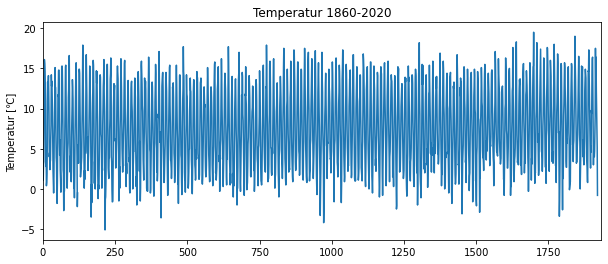

In [42]:
temp_mo=np.reshape(temp, (161*12, 1))

plt.figure(figsize=(10, 4)) # Lag akser å plotte i
ax=plt.axes()

# Plot tidsserien
ax.plot(temp_mo)

ax.set(
    title='Temperatur 1860-2020',
    ylabel='Temperatur [\u2103]',  
    xlim=(0, len(temp_mo)) # sett grense for x-aksen
)  

plt.show()

#### Oppgave 5:
Dette ble veldig rotete. Gi en forklaring på hvorfor, utover at det er mange flere datapunkt. 

#### 5. Månedlig oppløsning og årlig oppløsning i samme figur
Det skjer mye på midten av plottet, mens toppen og bunnen virker mer organisert. Vi vil plotte tidsserien sammen med sommer- og vinter-gjennomsnittene for å se om det finnes en sammenheng. 

**Lag en tidsvektor manuelt.**
Vi har imidlertid ingen tidvektor for den månedlige tidsserien. Den må vi lage selv. Det finnes funksjoner for slikt i Python, men siden vi opererer med måneder og ikke trenger å ta stilling til skuddår og slikt gjør vi det manuelt. Vi tar utgangspunkt i tidsvektoren over år. Hver måned skal være `1/12` år lengre enn forrige måned. 

Vi bruker denne fremgangsmåten:

- Lag en matrise med kun nuller, som vi gjorde da vi satte sammen vinter-månedene i Metode 1, men denne gangen med størrelse `temp.shape=(161,12)`.

In [43]:
time_mo=np.zeros(temp.shape) # 161 år, 12 måneder

- Januar er året uten noen desimaler, altså det samme som tidsserien over år: `tid + 1/12*0`. Sett derfor kolonne `0` til `tid`.

In [46]:
time_mo[:,0]=tid

- Februar skal være `tid + 1/12*1`, mars er `tid + 1/12*2` etc

In [47]:
# Dette kunne man gjort mye mer elegant med hjelp av en for-løkke, det kommer 
# vi til i neste del, Del 5. 

time_mo[:,1]=tid+1/12*1
time_mo[:,2]=tid+1/12*2
time_mo[:,3]=tid+1/12*3
time_mo[:,4]=tid+1/12*4
time_mo[:,5]=tid+1/12*5
time_mo[:,6]=tid+1/12*6
time_mo[:,7]=tid+1/12*7
time_mo[:,8]=tid+1/12*8
time_mo[:,9]=tid+1/12*9
time_mo[:,10]=tid+1/12*10
time_mo[:,11]=tid+1/12*11

In [48]:
time_mo

array([[1861.        , 1861.08333333, 1861.16666667, ..., 1861.75      ,
        1861.83333333, 1861.91666667],
       [1862.        , 1862.08333333, 1862.16666667, ..., 1862.75      ,
        1862.83333333, 1862.91666667],
       [1863.        , 1863.08333333, 1863.16666667, ..., 1863.75      ,
        1863.83333333, 1863.91666667],
       ...,
       [2019.        , 2019.08333333, 2019.16666667, ..., 2019.75      ,
        2019.83333333, 2019.91666667],
       [2020.        , 2020.08333333, 2020.16666667, ..., 2020.75      ,
        2020.83333333, 2020.91666667],
       [2021.        , 2021.08333333, 2021.16666667, ..., 2021.75      ,
        2021.83333333, 2021.91666667]])

#### Oppgave 6:
Bruk np.reshape akkurat som for temperatur for å lage en lang vektor heller enn en matrise

In [49]:
time_mo=

SyntaxError: invalid syntax (<ipython-input-49-5afc8c38d1a8>, line 1)

#### Oppgave 7: 
Lag en figur som viser både den månedlige tidsserien, vinter og sommer sammen.

Diskuter igjen forklaring på hvorfor det skjer så mye på midten av plottet, og kommenter på sommer- og vinter-gjennomsnittene i forhold til månedsgjennomsnittene.

#### Oppgave 8:
Lag en tilsvarende figur som den over, men plot januar og juli istedet for sommer og vinter. Inkluder en legend i figuren.

Diskuter forskjellene.